# Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn")

# Read the data

In [2]:
bikes = pd.read_csv("hour.csv")
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# Prelim analysis and Feature Selection

In [3]:
bikes_prep = bikes.copy()

In [4]:
bikes_prep.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
bikes_prep = bikes_prep.drop(["instant", "dteday", "casual", "registered"], 
                             axis=1)

In [6]:
bikes_prep.isnull().sum()

season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [7]:
bikes_prep.columns = ['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count']
bikes_prep.columns

Index(['season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
       'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')

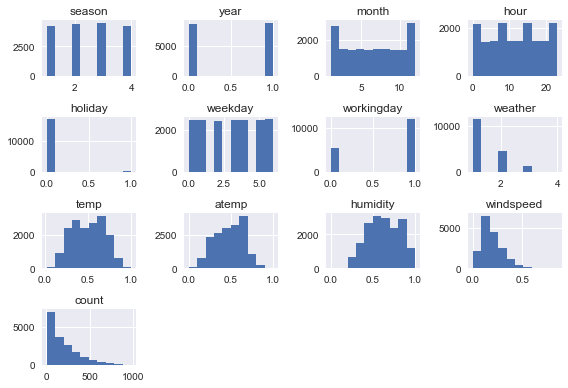

In [8]:
bikes_prep.hist()
plt.tight_layout()

# Exploratory Data Analysis

### Visualise the continuous features vs Count

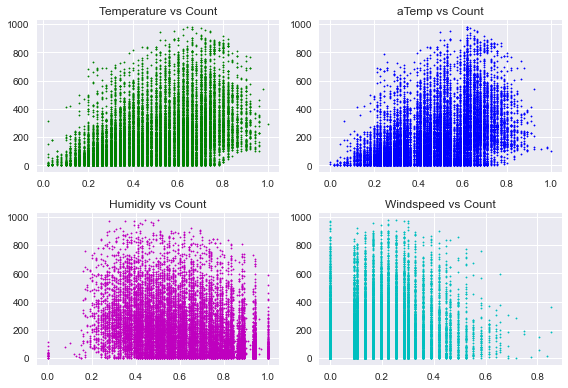

In [9]:
fig, axes = plt.subplots(2,2)
axes[0,0].set_title("Temperature vs Count")
axes[0,0].scatter(bikes_prep["temp"], bikes_prep["count"], s=2, c="g")

axes[0,1].set_title("aTemp vs Count")
axes[0,1].scatter(bikes_prep["atemp"], bikes_prep["count"], s=2, c="b")

axes[1,0].set_title("Humidity vs Count")
axes[1,0].scatter(bikes_prep["humidity"], bikes_prep["count"], s=2, c="m")

axes[1,1].set_title("Windspeed vs Count")
axes[1,1].scatter(bikes_prep["windspeed"], bikes_prep["count"], s=2, c="c")

plt.tight_layout()

In [10]:
colors = ["g", "r", "m", "b"]

In [11]:
bikes_prep["season"].unique()
bikes_prep.groupby("season").mean()["count"]


season
1    111.114569
2    208.344069
3    236.016237
4    198.868856
Name: count, dtype: float64

### Visualise the categorical features

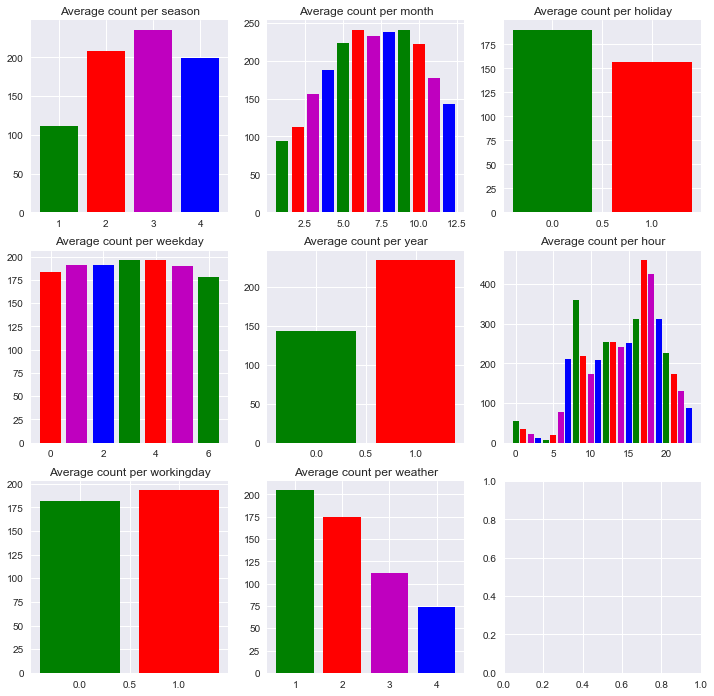

In [12]:
fig, axes = plt.subplots(3,3, figsize=(12,12))

plt.style.use("seaborn")

axes[0,0].set_title("Average count per season")
cat_list = bikes_prep["season"].unique()
cat_average = bikes_prep.groupby("season").mean()["count"]
axes[0,0].bar(cat_list, cat_average, color=colors)

axes[0,1].set_title("Average count per month")
cat_list = bikes_prep["month"].unique()
cat_average = bikes_prep.groupby("month").mean()["count"]
axes[0,1].bar(cat_list, cat_average, color=colors)

axes[0,2].set_title("Average count per holiday")
cat_list = bikes_prep["holiday"].unique()
cat_average = bikes_prep.groupby("holiday").mean()["count"]
axes[0,2].bar(cat_list, cat_average, color=colors)

axes[1,0].set_title("Average count per weekday")
cat_list = bikes_prep["weekday"].unique()
cat_average = bikes_prep.groupby("weekday").mean()["count"]
axes[1,0].bar(cat_list, cat_average, color=colors)

axes[1,1].set_title("Average count per year")
cat_list = bikes_prep["year"].unique()
cat_average = bikes_prep.groupby("year").mean()["count"]
axes[1,1].bar(cat_list, cat_average, color=colors)

axes[1,2].set_title("Average count per hour")
cat_list = bikes_prep["hour"].unique()
cat_average = bikes_prep.groupby("hour").mean()["count"]
axes[1,2].bar(cat_list, cat_average, color=colors)

axes[2,0].set_title("Average count per workingday")
cat_list = bikes_prep["workingday"].unique()
cat_average = bikes_prep.groupby("workingday").mean()["count"]
axes[2,0].bar(cat_list, cat_average, color=colors)

axes[2,1].set_title("Average count per weather")
cat_list = bikes_prep["weather"].unique()
cat_average = bikes_prep.groupby("weather").mean()["count"]
axes[2,1].bar(cat_list, cat_average, color=colors)



plt.show()

# Check for outliers

In [13]:
bikes_prep["count"].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: count, dtype: float64

In [14]:
bikes_prep["count"].quantile([0.05, 0.1, 0.15, 0.9, 0.95, 0.99])

0.05      5.00
0.10      9.00
0.15     16.00
0.90    451.20
0.95    563.10
0.99    782.22
Name: count, dtype: float64

# Check Multiple Linear Regression Assumptions

### Linearity using correlation coefficient matrix using corr

In [15]:
correlation = bikes_prep[["temp", "atemp", "humidity", 
                          "windspeed", "count"]].corr()
correlation

,temp,atemp,humidity,windspeed,count
temp,1.000000,0.987672,-0.069881,-0.023125,0.404772
atemp,0.987672,1.000000,-0.051918,-0.062336,0.400929
humidity,-0.069881,-0.051918,1.000000,-0.290105,-0.322911
windspeed,-0.023125,-0.062336,-0.290105,1.000000,0.093234
count,0.404772,0.400929,-0.322911,0.093234,1.000000


In [16]:
#weekday, temp, year, workingday
bikes_prep["windspeed"].describe()

count    17379.000000
mean         0.190098
std          0.122340
min          0.000000
25%          0.104500
50%          0.194000
75%          0.253700
max          0.850700
Name: windspeed, dtype: float64

In [17]:
bikes_prep.describe()

,season,year,month,hour,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


### Drop irrelevant features

In [18]:
bikes_prep = bikes_prep.drop(["weekday", "year",
                              "workingday", "atemp", "windspeed"], axis=1)

### Autocorrelation of demand using acor

In [19]:
dff1 = pd.to_numeric(bikes_prep["count"], downcast="float")

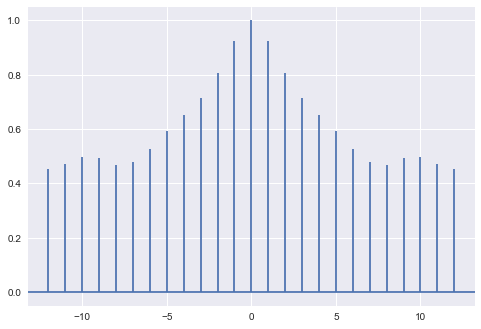

In [20]:
plt.acorr(dff1, maxlags=12)
plt.show()

# Create/Modify new features

### Log Normalise the feature 'count'

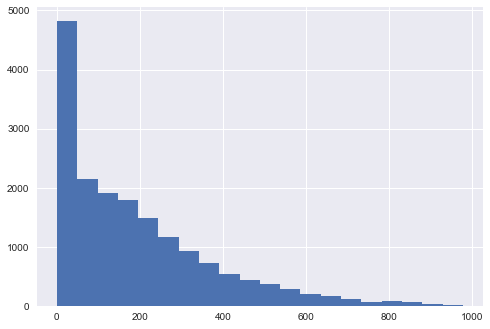

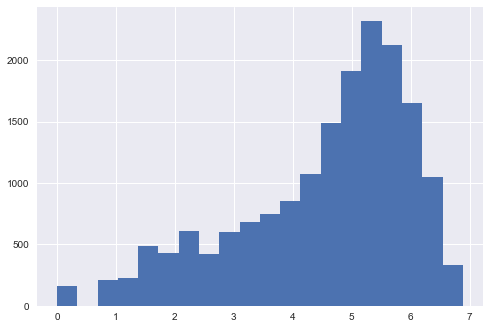

In [21]:
df1 = bikes_prep["count"]
df2 = np.log(df1)

plt.figure()
df1.hist(bins=20)

plt.figure()
df2.hist(bins=20)

bikes_prep["count"] = np.log(bikes_prep["count"])

### Solve the problem of Autocorrelation
    Shift the demand by 3 lags

In [22]:
t_1 = bikes_prep["count"].shift(+1).to_frame()
t_1.columns = ["t-1"]

t_2 = bikes_prep["count"].shift(+2).to_frame()
t_2.columns = ["t-2"]

t_3 = bikes_prep["count"].shift(+3).to_frame()
t_3.columns = ["t-3"]

bikes_prep_lag = pd.concat([bikes_prep, t_1, t_2, t_3], axis=1)

bikes_prep_lag = bikes_prep_lag.dropna()

bikes_prep_lag

,season,month,hour,holiday,weather,temp,humidity,count,t-1,t-2,t-3
3,1,1,3,0,1,0.24,0.75,2.564949,3.465736,3.688879,2.772589
4,1,1,4,0,1,0.24,0.75,0.000000,2.564949,3.465736,3.688879
5,1,1,5,0,2,0.24,0.75,0.000000,0.000000,2.564949,3.465736
6,1,1,6,0,1,0.22,0.80,0.693147,0.000000,0.000000,2.564949
7,1,1,7,0,1,0.20,0.86,1.098612,0.693147,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
17374,1,12,19,0,2,0.26,0.60,4.779123,4.804021,5.099866,5.365976
17375,1,12,20,0,2,0.26,0.60,4.488636,4.779123,4.804021,5.099866
17376,1,12,21,0,1,0.26,0.60,4.499810,4.488636,4.779123,4.804021
17377,1,12,22,0,1,0.26,0.56,4.110874,4.499810,4.488636,4.779123


# Create Dummy Variables and drop first to avoid dummy variables trap

In [23]:
bikes_prep_lag.dtypes

season        int64
month         int64
hour          int64
holiday       int64
weather       int64
temp        float64
humidity    float64
count       float64
t-1         float64
t-2         float64
t-3         float64
dtype: object

In [24]:
bikes_prep_lag['season'] = bikes_prep_lag['season'].astype('category')
bikes_prep_lag['holiday'] = bikes_prep_lag['holiday'].astype('category')
bikes_prep_lag['weather'] = bikes_prep_lag['weather'].astype('category')
bikes_prep_lag['month'] = bikes_prep_lag['month'].astype('category')
bikes_prep_lag['hour'] = bikes_prep_lag['hour'].astype('category')

bikes_prep_lag = pd.get_dummies(bikes_prep_lag, drop_first=True)
bikes_prep_lag

,temp,humidity,count,t-1,t-2,t-3,season_2,season_3,season_4,month_2,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,holiday_1,weather_2,weather_3,weather_4
3,0.24,0.75,2.564949,3.465736,3.688879,2.772589,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.24,0.75,0.000000,2.564949,3.465736,3.688879,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.24,0.75,0.000000,0.000000,2.564949,3.465736,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6,0.22,0.80,0.693147,0.000000,0.000000,2.564949,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.20,0.86,1.098612,0.693147,0.000000,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,0.26,0.60,4.779123,4.804021,5.099866,5.365976,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
17375,0.26,0.60,4.488636,4.779123,4.804021,5.099866,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
17376,0.26,0.60,4.499810,4.488636,4.779123,4.804021,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
17377,0.26,0.56,4.110874,4.499810,4.488636,4.779123,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Create Train and test split

    Target variable is of time-series type

In [25]:
Y = bikes_prep_lag[["count"]]
X = bikes_prep_lag.drop(["count"], axis=1)

tr_size = int(0.7*len(X))

X_train = X.values[0:tr_size]
X_test = X.values[tr_size:len(X)]

Y_train = Y.values[0:tr_size]
Y_test = Y.values[tr_size:len(Y)]

# Fit and Score the model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

std_reg = LinearRegression()
std_reg.fit(X_train, Y_train)

r2_train = std_reg.score(X_train, Y_train)
r2_test = std_reg.score(X_test, Y_test)

print(r2_train)
print(r2_test)


0.9195240591465778
0.9287151360253387


In [27]:

Y_predict = std_reg.predict(X_test)

rmse = math.sqrt(mean_squared_error(Y_test, Y_predict))
rmse

0.38098800498170415

In [28]:

Y_test_e = []
Y_predict_e = []

for i in range(0, len(Y_test)):
    Y_test_e.append(math.exp(Y_test[i]))
    Y_predict_e.append(math.exp(Y_predict[i]))


In [29]:
  
log_sq_sum = 0.0

for i in range(0, len(Y_test_e)):
    log_a = math.log(Y_test_e[i] + 1)
    log_p = math.log(Y_predict_e[i] + 1)
    log_diff = (log_p-log_a)**2
    log_sq_sum = log_sq_sum + log_diff

    
rmsle = math.sqrt(log_sq_sum/len(Y_test))

rmsle

0.3560941706980206

## RMSLE of Model: 0.356